<a href="https://colab.research.google.com/github/elaine-chenma/Predicting_Customer_Churn/blob/master/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Customer Churn

## Data Source

Data source: https://www.kaggle.com/c/customer-churn-prediction/data

## Data Analysis Plan

In [1]:
from IPython.display import Image
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg


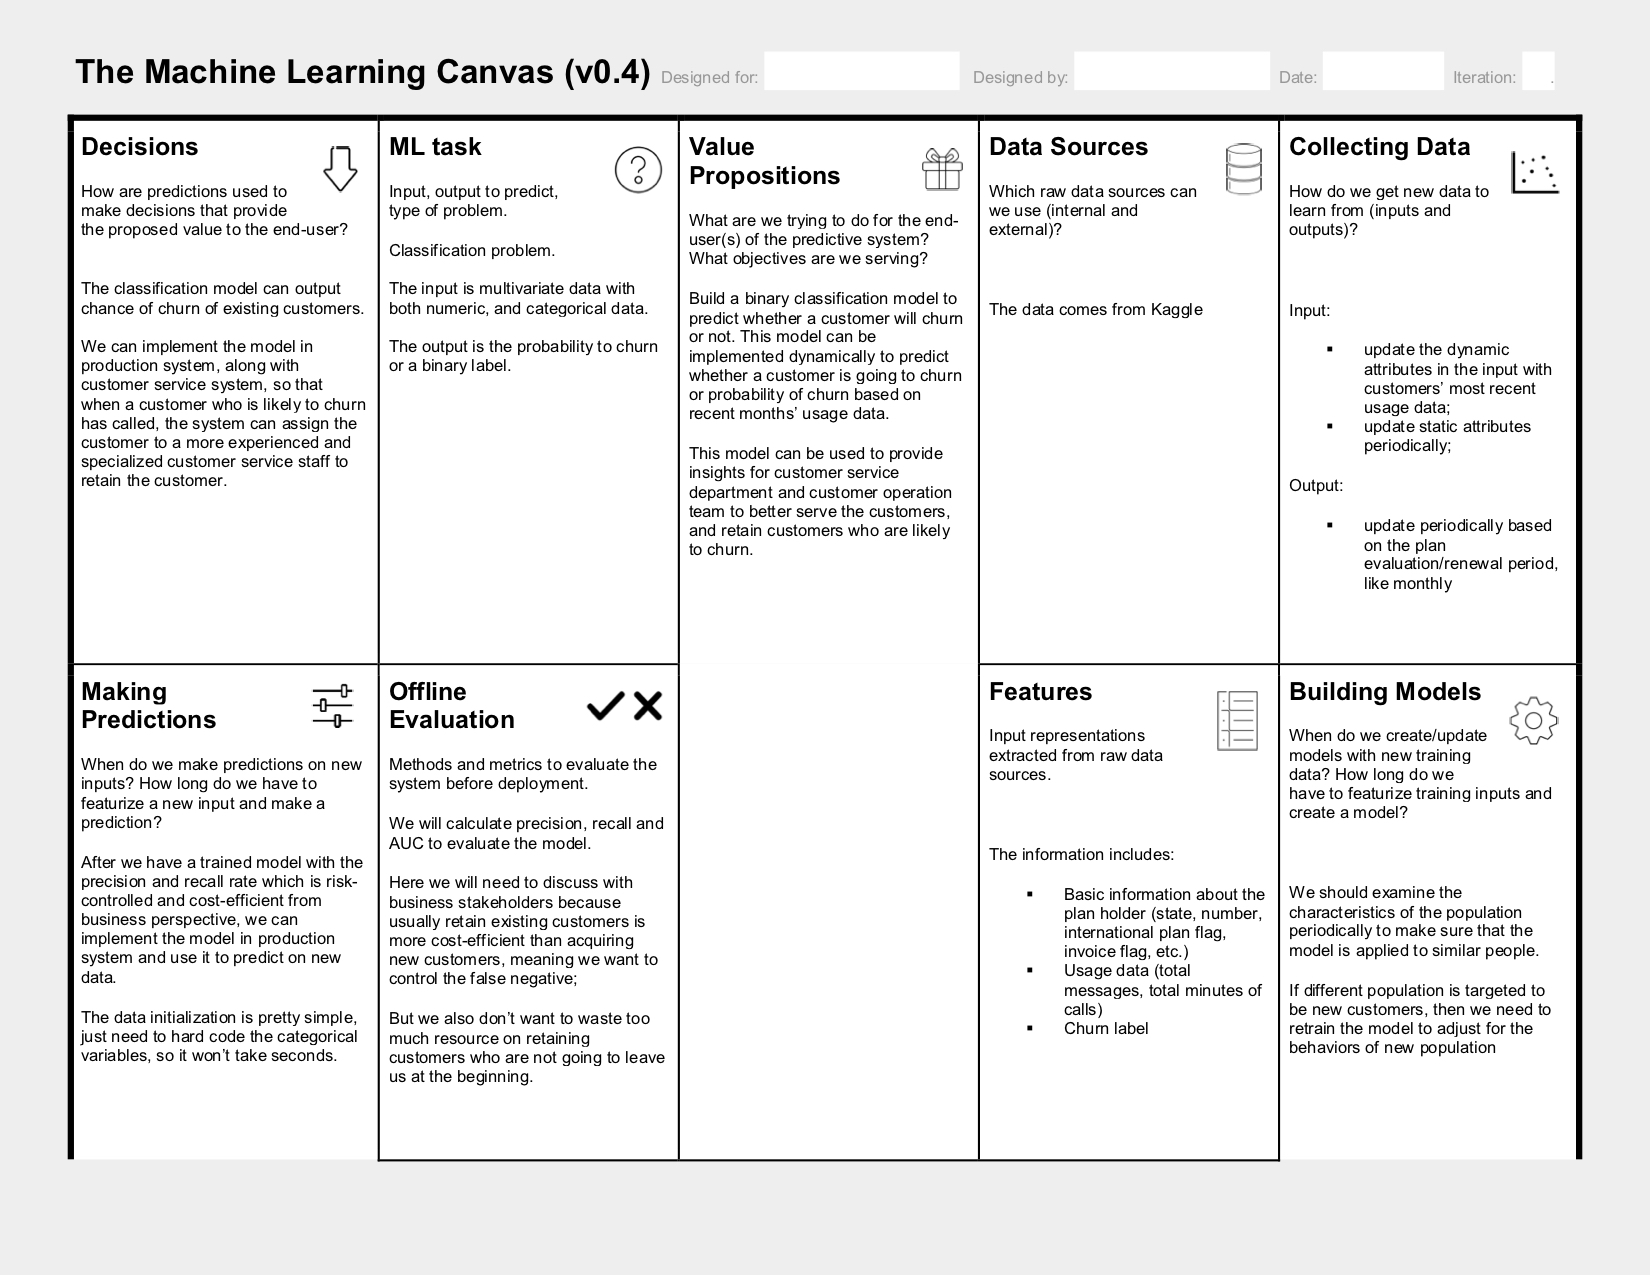

In [5]:
Image("1.jpg", width=1150)

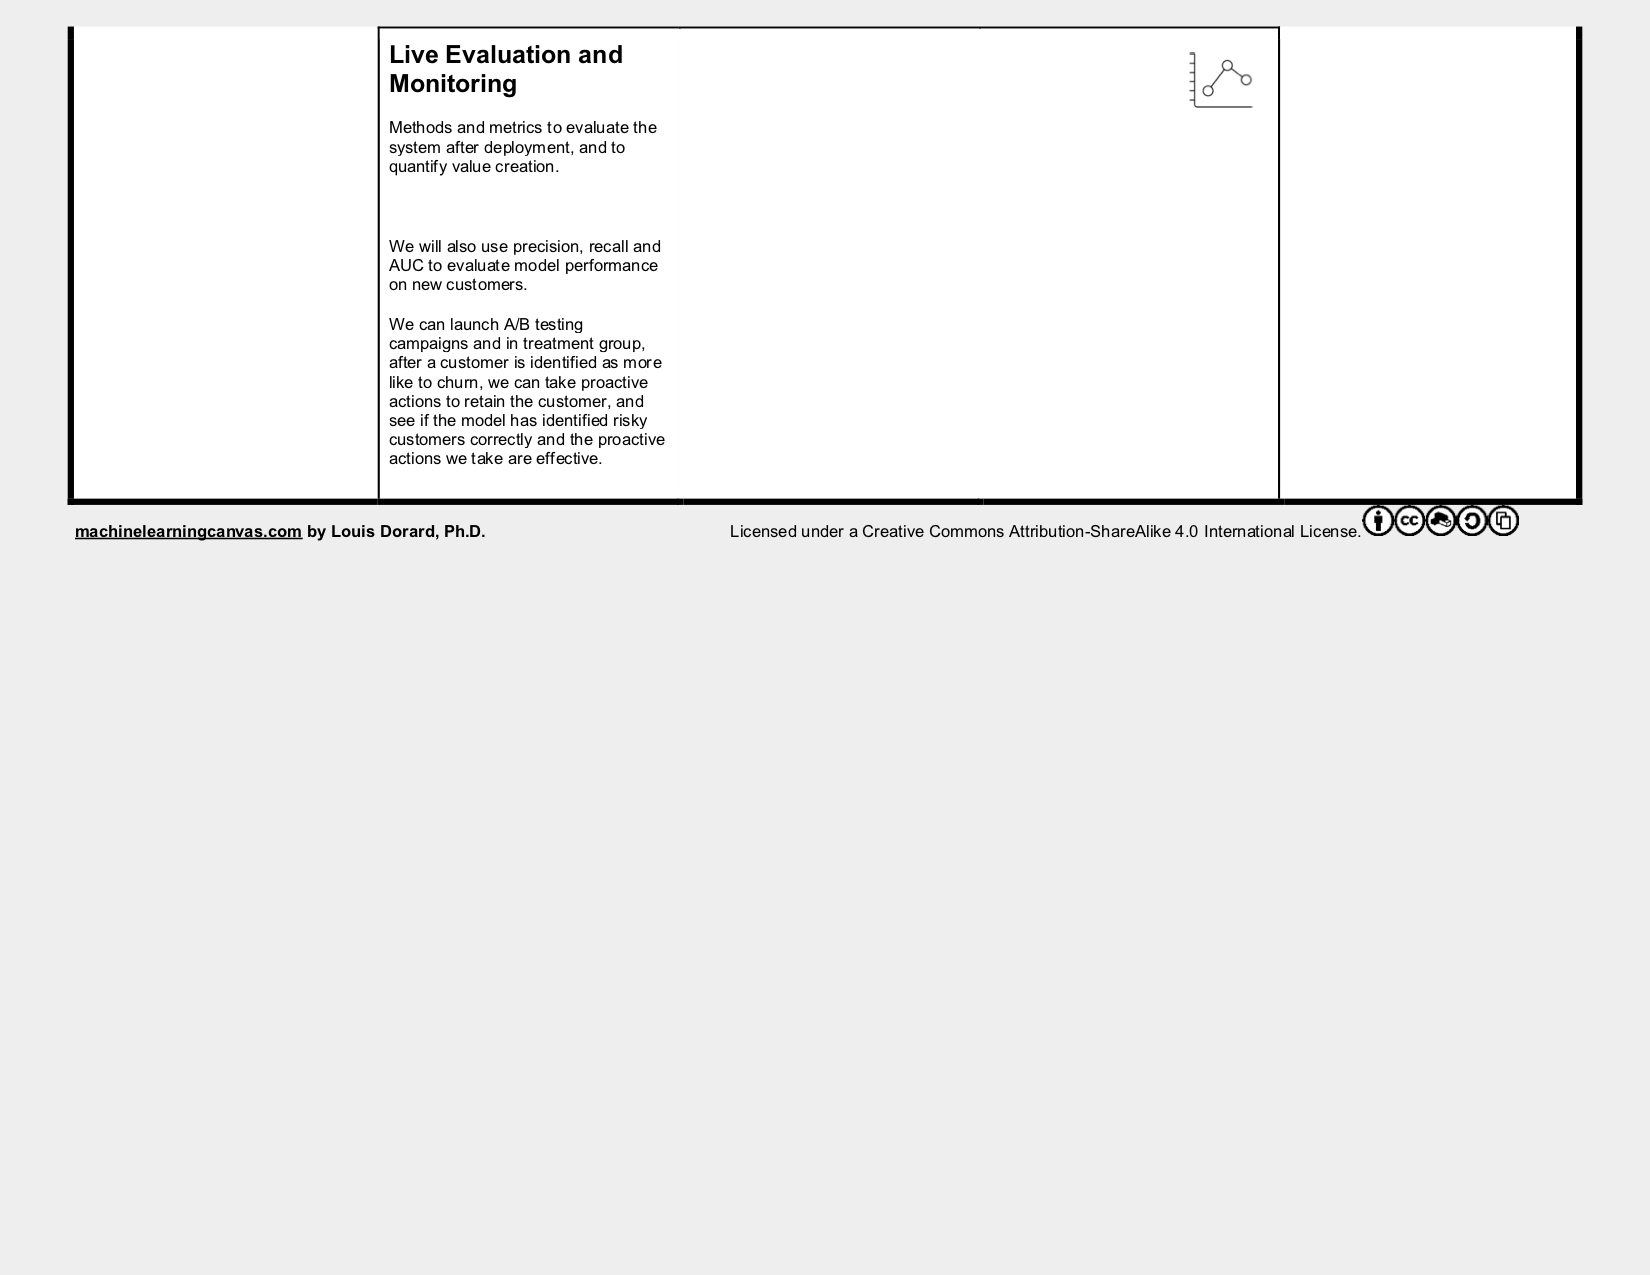

In [6]:
Image("2.jpg", width=1150)

## 1. Import data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from yellowbrick.classifier import ROCAUC


np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings


In [0]:
train_url = 'https://raw.githubusercontent.com/elaine-chenma/Predicting_Customer_Churn/master/data/churn_train.txt'

test_url= 'https://raw.githubusercontent.com/elaine-chenma/Predicting_Customer_Churn/master/data/churn_test.txt'


In [0]:
train_df = pd.read_table(train_url,sep= ',' ,)
test_df = pd.read_table(test_url, sep = ',')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [0]:
train_df.shape

(3333, 21)

In [0]:
test_df.shape

(1667, 21)

In [0]:
train_df.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


**Strip the whitespace in column names**

In [0]:
train_df.columns

Index(['st', ' acclen', ' arcode', ' phnum', ' intplan', ' voice',
       'nummailmes', ' tdmin', ' tdcal', ' tdchar', ' temin', ' tecal',
       ' tecahr', ' tnmin', ' tn cal', ' tnchar', ' timin', ' tical',
       ' tichar', ' ncsc', ' label'],
      dtype='object')

In [0]:
train_df.columns = train_df.columns.str.strip()

In [0]:
train_df.columns

Index(['st', 'acclen', 'arcode', 'phnum', 'intplan', 'voice', 'nummailmes',
       'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin',
       'tn cal', 'tnchar', 'timin', 'tical', 'tichar', 'ncsc', 'label'],
      dtype='object')

In [0]:
test_df.columns = test_df.columns.str.strip()

**Transform the data types**

In [0]:
train_df['label'][train_df['label'].str.strip() == 'False.'] = 0
train_df['label'][train_df['label'].str.strip() == 'True.'] = 1

In [0]:
test_df['label'][test_df['label'].str.strip() == 'False.'] = 0
test_df['label'][test_df['label'].str.strip() == 'True.'] = 1

In [0]:
train_df.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [0]:
train_df.dtypes

st             object
acclen          int64
arcode          int64
phnum          object
intplan        object
voice          object
nummailmes      int64
tdmin         float64
tdcal           int64
tdchar        float64
temin         float64
tecal           int64
tecahr        float64
tnmin         float64
tn cal          int64
tnchar        float64
timin         float64
tical           int64
tichar        float64
ncsc            int64
label          object
dtype: object

In [0]:
train_df['arcode'] = train_df['arcode'].astype('object')
train_df['phnum'] = train_df['phnum'].astype('object')

test_df['arcode'] = test_df['arcode'].astype('object')
test_df['phnum'] = test_df['phnum'].astype('object')

In [0]:
train_df['label'] = train_df['label'].astype('int64')

test_df['label'] = test_df['label'].astype('int64')

## 2. EDA

### 2.1 Let's examine the categorical variables 

#### State

Most states have relatively equal number of users, except for Califora with very small number of users, and West Verginia with very big number of users.

We can also see from the churn rate plot below that different state has differenet churn rate, range from 0.05 to 0.25.

Text(0.5,1,'Customer churn and state')

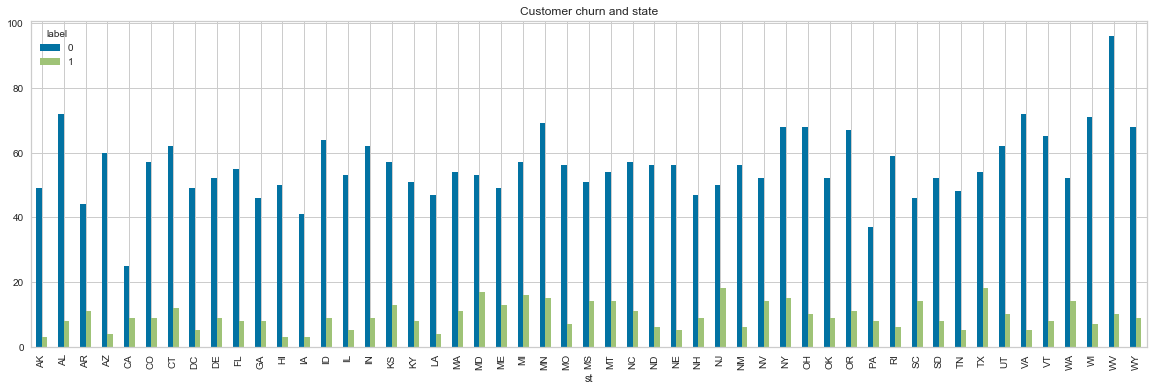

In [0]:
pd.crosstab(train_df['st'], train_df['label']).plot(kind = 'bar', figsize=(20,6))
plt.title('Customer churn and state')

In [0]:
churn_rate = train_df.groupby(by = 'st', axis = 0).agg('mean')['label'].reset_index()

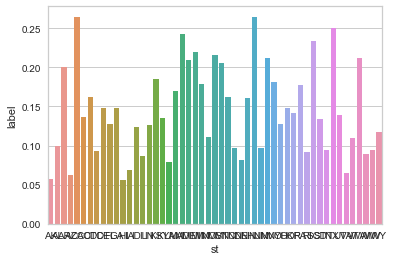

In [0]:
sns.barplot(churn_rate['st'], churn_rate['label'])

#### Intplan

This plot shows that international plan owner seems to have a higher rate of churning. One reasonable speculation is that they might be using the plan for temprary trip, hence discard the plan right after their trip.


Text(0.5,1,'Customer churn and intplan')

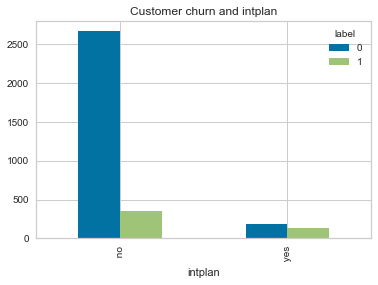

In [0]:
pd.crosstab(train_df['intplan'], train_df['label']).plot(kind = 'bar')
plt.title('Customer churn and intplan')

#### Voice


Text(0.5,1,'Customer churn and voice')

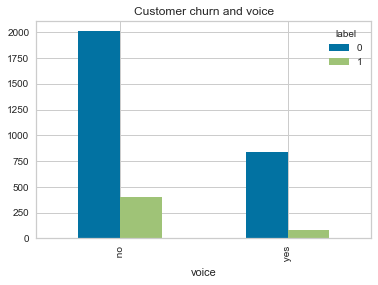

In [0]:
pd.crosstab(train_df['voice'], train_df['label']).plot(kind = 'bar')
plt.title('Customer churn and voice')

### 2.2 Check the numerical variables

From the heatmap below, we can see that among the numerical variables, most of the variables are not correlated with each other. In terms of the correlation between attributes and churn label, tdmin, tdchar, ncsc has a positive correlation(around 0.5) with customer churn.

Text(0.5,1,'heatmap')

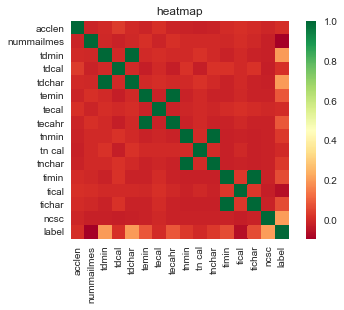

In [0]:
sns.heatmap(train_df.corr(), square=True, cmap='RdYlGn')
plt.title('heatmap')


## 3. Data Transformation

We will first discard columns we dont need, and then hard code categorical variables for sklearn ml models, discard the first dummy variables.


In [0]:
X_train = train_df.drop(['st', 'acclen', 'arcode', 'phnum','label'], axis = 1)
y_train = train_df['label']

In [0]:
X_test = test_df.drop(['st', 'acclen', 'arcode', 'phnum','label'], axis = 1)
y_test = test_df['label']

In [0]:
X_train.head()

,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [0]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [0]:
X_train.head()

,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,intplan_ yes,voice_ yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [0]:
feature_list = X_train.columns

### Last, since this is a classificatio problem, let's check whether it's balanced.

This is imbalanced data.

In [0]:
y_train.value_counts()

0    2850
1     483
Name: label, dtype: int64

### SMOTE to oversampling the data

In [0]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [0]:
print('label = 1: ',sum(y_train==1))
print('label = 0: ',sum(y_train==0))

label = 1:  2850
label = 0:  2850


## 4. modeling
### 4.1 Logistic Regression

** Fit the model **

In [0]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Grid Search for Logistic Regression

In [0]:
# Create Hyperparameter Search Space
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
# Create Grid Search
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

In [0]:
clf

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Conduct Grid Search
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [0]:
# View Hyperparameter Values Of Best Model
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 21.544346900318832


In [0]:
# Predict Using Best Model
# Predict target vector
y_pred_log = best_model.predict(X_test)
y_pred_log[:5]

array([0, 0, 1, 0, 0])

** Confusion matrix, precision, recall **

In [0]:
y_pred_log.dtype

dtype('int64')

In [0]:
y_test.dtype

dtype('int64')

In [0]:
# Compute and print the confusion matrix and classification report
confusion_mat = confusion_matrix(y_test, y_pred_log)
confusion_mat

array([[1106,  337],
       [  46,  178]])

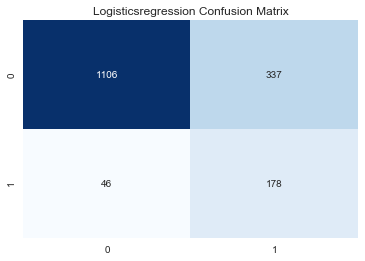

In [0]:
plt.title("Logisticsregression Confusion Matrix")
sns.heatmap(confusion_mat,annot=True,cmap="Blues",fmt="d",cbar=False)

** AUC, ROC**

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail



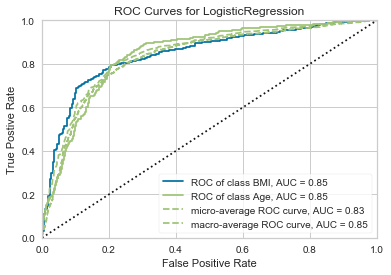

In [0]:
classes = ["BMI", "Age"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
auc(fpr, tpr)

0.7805508118008118

### SVM

We have divided the data into training and testing sets. Now is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. This class takes one parameter, which is the kernel type. This is very important. In the case of a simple SVM we simply set this parameter as "linear" since simple SVMs can only classify linearly separable data. We will see non-linear kernels in the next section.

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [0]:
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
#Grid Search
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75)}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': (1, 0.25, 0.5, 0.75)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [0]:
y_pred_SVC = svm.predict(X_test)  
y_pred_SVC

array([0, 0, 1, ..., 0, 0, 0])

** Confusion matrix, precision, recall **

** AUC, ROC**

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail



In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_SVC)
auc(fpr, tpr)

0.7847815191565191

### Random Forest Classifier


In [0]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [0]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [0]:

rfc1.fit(X_train, y_train)

y_pred_rf=rfc1.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

#### Confusion matrix, precision, recall 

#### AUC, ROC

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail



In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
auc(fpr, tpr)

0.8726874195624195

#### Interpreting feature importance

We can see that the most important features are **intplan, ncsc, tdmin, tdchar.**

Combined with our EDA, we can see that international plan users has larger chance to churn. Customer who has a lot of customer service calls, may have problems with their account, plan or service, hence has a larger chance to churn. Besides, total number of messages daily and total daytime charges indicates whether the user is very active and also how much money the user spends daily.

In [0]:

# Get numerical feature importances
importances = list(rfc1.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: intplan_ yes         Importance: 0.23
Variable: ncsc                 Importance: 0.17
Variable: tdmin                Importance: 0.14
Variable: tdchar               Importance: 0.13
Variable: tecahr               Importance: 0.05
Variable: voice_ yes           Importance: 0.05
Variable: nummailmes           Importance: 0.04
Variable: temin                Importance: 0.04
Variable: tical                Importance: 0.04
Variable: tnmin                Importance: 0.02
Variable: tnchar               Importance: 0.02
Variable: timin                Importance: 0.02
Variable: tichar               Importance: 0.02
Variable: tdcal                Importance: 0.01
Variable: tecal                Importance: 0.01
Variable: tn cal               Importance: 0.01


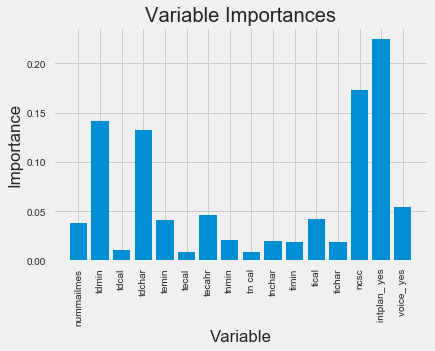

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
importances.sort(by)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Model Comparison, Logistic Regression vs. SVM vs. Random Forest

Below table is the model performance of three models obtained with GridSearch with 5 folds. We can see that **Random Forest outperforms the other models on Precisision and AUC. While SVM outperforms other models on Recall.**



|Indicators | LogisticRegression|  SVM|  Random Forest|
| ------------- |-------------|------------- |-------------|
|Precision| 0.96|0.96|0.96|
|Recalls |0.34|0.33|0.86|
|AUC| 0.78|0.78|0.87|


In the case of identifying customers who are prone to churn, we think **false negative error(Recall) is more important than false positive (Precision).** While it's true that if we identify customers who are not going to leave us and spend resources to retain them, it will be inefficient way of using resources. The cost of acquiring new customers are really high, and we want to make sure that we retain existing customers as much as possible. So false negative is more important than false positve, and we can risk identifying customers who will not churn, but we want to minimize the risk of failing to identify churning customers.

## H2O AutoML

In [0]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()
# ingest data into H2O
train = h2o.import_file(train_url)
valid = h2o.import_file(test_url)
#Define x and y columns
x = train.columns
y='label'

x.remove(y)

# Convert y column into factors
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment 18.9 (build 11.0.2+9); OpenJDK 64-Bit Server VM 18.9 (build 11.0.2+9, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/vc/2tj60vbj1h14d2y1dm0j7f340000gn/T/tmplngk6b2w
  JVM stdout: /var/folders/vc/2tj60vbj1h14d2y1dm0j7f340000gn/T/tmplngk6b2w/h2o_machen_started_from_python.out
  JVM stderr: /var/folders/vc/2tj60vbj1h14d2y1dm0j7f340000gn/T/tmplngk6b2w/h2o_machen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_machen_qfkkau
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
# Using AutoML to train the model
aml = H2OAutoML(max_models = 10, max_runtime_secs=999999999)
aml.train(x=x, y=y, training_frame = train, validation_frame = valid)

# Review AutoML result
lb = aml.leaderboard
lb

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190515_200909,0.913811,0.16095,0.1108,0.200717,0.0402874
XGBoost_3_AutoML_20190515_200909,0.913322,0.169496,0.109799,0.203734,0.0415074
StackedEnsemble_AllModels_AutoML_20190515_200909,0.912498,0.161175,0.127118,0.200859,0.0403444
GBM_1_AutoML_20190515_200909,0.912478,0.189025,0.125713,0.217876,0.0474697
GBM_3_AutoML_20190515_200909,0.910527,0.192381,0.139118,0.220269,0.0485184
DRF_1_AutoML_20190515_200909,0.908984,0.483415,0.130187,0.236931,0.0561365
XGBoost_1_AutoML_20190515_200909,0.908761,0.180111,0.126293,0.20966,0.0439571
GBM_2_AutoML_20190515_200909,0.908559,0.191548,0.150962,0.219573,0.0482124
XGBoost_2_AutoML_20190515_200909,0.906678,0.204341,0.126538,0.229954,0.052879
GBM_4_AutoML_20190515_200909,0.901222,0.207722,0.145312,0.227866,0.0519228


In [0]:
# Winning Model
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20190515_200909
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.02053203471691973
RMSE: 0.14329003704696194
LogLoss: 0.09279515529274741
Null degrees of freedom: 3332
Residual degrees of freedom: 3329
Null deviance: 2758.293324973648
Residual deviance: 618.5725051814543
AIC: 626.5725051814543
AUC: 0.9881900403181867
pr_auc: 0.9564414139948755
Gini: 0.9763800806363734
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.513535144129972: 


,False.,True.,Error,Rate
False.,2848.0,2.0,0.0007,(2.0/2850.0)
True.,69.0,414.0,0.1429,(69.0/483.0)
Total,2917.0,416.0,0.0213,(71.0/3333.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5135351,0.9210234,146.0
max f2,0.1891331,0.8840823,176.0
max f0point5,0.6249751,0.9643360,142.0
max accuracy,0.5135351,0.9786979,146.0
max precision,0.9943361,1.0,0.0
max recall,0.0232358,1.0,374.0
max specificity,0.9943361,1.0,0.0
max absolute_mcc,0.5135351,0.9121759,146.0
max min_per_class_accuracy,0.0564150,0.9333333,264.0
max mean_per_class_accuracy,0.0629240,0.9343293,253.0


Gains/Lift Table: Avg response rate: 14.49 %, avg score: 14.76 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102010,0.9891394,6.9006211,6.9006211,1.0,0.9908526,1.0,0.9908526,0.0703934,0.0703934,590.0621118,590.0621118
,2,0.0201020,0.9862723,6.9006211,6.9006211,1.0,0.9875477,1.0,0.9892248,0.0683230,0.1387164,590.0621118,590.0621118
,3,0.0300030,0.9831665,6.9006211,6.9006211,1.0,0.9849110,1.0,0.9878012,0.0683230,0.2070393,590.0621118,590.0621118
,4,0.0402040,0.9810197,6.9006211,6.9006211,1.0,0.9822221,1.0,0.9863856,0.0703934,0.2774327,590.0621118,590.0621118
,5,0.0501050,0.9778116,6.9006211,6.9006211,1.0,0.9793969,1.0,0.9850046,0.0683230,0.3457557,590.0621118,590.0621118
,6,0.1002100,0.9390639,6.9006211,6.9006211,1.0,0.9670493,1.0,0.9760270,0.3457557,0.6915114,590.0621118,590.0621118
,7,0.1500150,0.0936562,3.7828706,5.8655280,0.5481928,0.5073668,0.85,0.8204318,0.1884058,0.8799172,278.2870613,486.5527950
,8,0.2001200,0.0527931,1.1569904,4.6866287,0.1676647,0.0683379,0.6791604,0.6321264,0.0579710,0.9378882,15.6990367,368.6628735
,9,0.3000300,0.0331019,0.5387872,3.3053975,0.0780781,0.0401811,0.479,0.4350086,0.0538302,0.9917184,-46.1212766,230.5397516
,10,0.3999400,0.0283082,0.0414452,2.4900216,0.0060060,0.0304404,0.3608402,0.3339425,0.0041408,0.9958592,-95.8554828,149.0021574




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.033261891377131925
RMSE: 0.18237842903460905
LogLoss: 0.1386396674545031
Null degrees of freedom: 1666
Residual degrees of freedom: 1663
Null deviance: 1317.1761996055084
Residual deviance: 462.2246512933133
AIC: 470.2246512933133
AUC: 0.9320317914067914
pr_auc: 0.8772974259226205
Gini: 0.8640635828135828
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5295804500109615: 


,False.,True.,Error,Rate
False.,1440.0,3.0,0.0021,(3.0/1443.0)
True.,56.0,168.0,0.25,(56.0/224.0)
Total,1496.0,171.0,0.0354,(59.0/1667.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5295805,0.8506329,126.0
max f2,0.1078044,0.8274336,185.0
max f0point5,0.5295805,0.9251101,126.0
max accuracy,0.5295805,0.9646071,126.0
max precision,0.9946783,1.0,0.0
max recall,0.0204417,1.0,396.0
max specificity,0.9946783,1.0,0.0
max absolute_mcc,0.5295805,0.8407155,126.0
max min_per_class_accuracy,0.0427933,0.875,266.0
max mean_per_class_accuracy,0.1078044,0.9011252,185.0


Gains/Lift Table: Avg response rate: 13.44 %, avg score: 12.86 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101980,0.9875327,7.4419643,7.4419643,1.0,0.9911949,1.0,0.9911949,0.0758929,0.0758929,644.1964286,644.1964286
,2,0.0203959,0.9831310,7.4419643,7.4419643,1.0,0.9860256,1.0,0.9886102,0.0758929,0.1517857,644.1964286,644.1964286
,3,0.0299940,0.9792789,7.4419643,7.4419643,1.0,0.9812395,1.0,0.9862516,0.0714286,0.2232143,644.1964286,644.1964286
,4,0.0401920,0.9766515,7.4419643,7.4419643,1.0,0.9780461,1.0,0.9841696,0.0758929,0.2991071,644.1964286,644.1964286
,5,0.0503899,0.9717459,7.4419643,7.4419643,1.0,0.9742645,1.0,0.9821650,0.0758929,0.375,644.1964286,644.1964286
,6,0.1001800,0.5624720,7.2626398,7.3528390,0.9759036,0.8645312,0.9880240,0.9237003,0.3616071,0.7366071,626.2639845,635.2838965
,7,0.1499700,0.0820579,2.0622311,5.5963571,0.2771084,0.2371583,0.752,0.6957684,0.1026786,0.8392857,106.2231067,459.6357143
,8,0.2003599,0.0505160,0.3543793,4.2780154,0.0476190,0.0619338,0.5748503,0.5363609,0.0178571,0.8571429,-64.5620748,327.8015398
,9,0.2999400,0.0332168,0.3138178,2.9619018,0.0421687,0.0393554,0.398,0.3713550,0.03125,0.8883929,-68.6182229,196.1901786
,10,0.4001200,0.0283513,0.4010639,2.3207325,0.0538922,0.0305729,0.3118441,0.2860318,0.0401786,0.9285714,-59.8936056,132.0732491




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.04028739323528962
RMSE: 0.20071719715881253
LogLoss: 0.16094963157707368
Null degrees of freedom: 3332
Residual degrees of freedom: 3328
Null deviance: 2759.9804817445793
Residual deviance: 1072.8902440927732
AIC: 1082.8902440927732
AUC: 0.9138109767171553
pr_auc: 0.8603981499675014
Gini: 0.8276219534343106
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2457404258594768: 


,False.,True.,Error,Rate
False.,2779.0,71.0,0.0249,(71.0/2850.0)
True.,95.0,388.0,0.1967,(95.0/483.0)
Total,2874.0,459.0,0.0498,(166.0/3333.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2457404,0.8237792,198.0
max f2,0.1815330,0.8212660,215.0
max f0point5,0.7599411,0.8812665,114.0
max accuracy,0.5050559,0.9522952,158.0
max precision,0.9944134,1.0,0.0
max recall,0.0178674,1.0,398.0
max specificity,0.9944134,1.0,0.0
max absolute_mcc,0.4853985,0.7985244,161.0
max min_per_class_accuracy,0.0450561,0.8695652,301.0
max mean_per_class_accuracy,0.0814016,0.8958167,264.0


Gains/Lift Table: Avg response rate: 14.49 %, avg score: 14.50 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102010,0.9849193,6.9006211,6.9006211,1.0,0.9883905,1.0,0.9883905,0.0703934,0.0703934,590.0621118,590.0621118
,2,0.0201020,0.9816356,6.9006211,6.9006211,1.0,0.9836048,1.0,0.9860334,0.0683230,0.1387164,590.0621118,590.0621118
,3,0.0300030,0.9780223,6.6915114,6.8316149,0.9696970,0.9794668,0.99,0.9838664,0.0662526,0.2049689,569.1511387,583.1614907
,4,0.0402040,0.9732810,6.9006211,6.8491239,1.0,0.9753861,0.9925373,0.9817147,0.0703934,0.2753623,590.0621118,584.9123945
,5,0.0501050,0.9700168,6.9006211,6.8593000,1.0,0.9717497,0.9940120,0.9797456,0.0683230,0.3436853,590.0621118,585.9300033
,6,0.1002100,0.8238434,6.3634470,6.6113735,0.9221557,0.9289624,0.9580838,0.9543540,0.3188406,0.6625259,536.3447019,561.1373526
,7,0.1500150,0.1641107,3.2008905,5.4790932,0.4638554,0.4655384,0.794,0.7920672,0.1594203,0.8219462,220.0890519,447.9093168
,8,0.2001200,0.0580125,0.7024584,4.2831441,0.1017964,0.0901845,0.6206897,0.6163334,0.0351967,0.8571429,-29.7541563,328.3144142
,9,0.3000300,0.0346161,0.1450581,2.9051615,0.0210210,0.0428921,0.421,0.4253775,0.0144928,0.8716356,-85.4941898,190.5161491
,10,0.3999400,0.0289809,0.2693936,2.2467139,0.0390390,0.0315359,0.3255814,0.3269909,0.0269151,0.8985507,-73.0606383,124.6713852


In [0]:
# Consusion matrix on validation set
aml.leader.confusion_matrix(valid=True)

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5295804500109615: 


,False.,True.,Error,Rate
False.,1440.0,3.0,0.0021,(3.0/1443.0)
True.,56.0,168.0,0.25,(56.0/224.0)
Total,1496.0,171.0,0.0354,(59.0/1667.0)


In [0]:
# precision and recall
confusion_mat_automl = np.array([(1440,56),(56,168)])
confusion_mat_automl

array([[1440,   56],
       [  56,  168]])

In [0]:
precision = confusion_mat_automl[0,0]/(confusion_mat_automl[0,0]+confusion_mat_automl[1,0])
print('precision : ', precision )

recall = confusion_mat_automl[1,1]/(confusion_mat_automl[1,1]+confusion_mat_automl[0,1])
print('recall : ', recall)

precision :  0.9625668449197861
recall :  0.75


## Result Comparison: sklearn vs AutoML

We can see that the best model we have from sklearn with 5-fold grid search is Random Forest, and the best model with H2O automl is xgboost.

Based on our business analysis above, we think that **recall is more important than precision** as a model performance indicator. We can see that RF model has a recall of 0.86, while AutoML has a recall of 0.75. So based on recall, we would say Sklearn gives a better model.

But, it's worth noticing that, while applying AutoML, we used mostly default parameter settings, and we can see that actually if we look at precisio or AUC, AutoML actually yields better result. This is to say, if we feed the AutoML with model selection criteria as F1 score or recall, then AutoML has a potential to give us better result because it uses more complex model XGBoost.


## Business Recommendations

1. International plans are more likely to churn, investigate the reason behind customer churn

We can see from our random forest model that whether a customer is using international plan has the biggest influence on the result, hence I will recommend my stakeholders to investigate the reasons behind the churn. They can do this with customer survey or feedback call. With the insights on why international plan users churn, they can take preventive actions. 

For example, if most customers churn because they are only using the service for short trips, then stakeholders can **collect the data why customers choose international plan**, and treat customers with one-time use purpose differently: since they has less LTV, we can devote less resources like marketing touches to retain these customers.

2. Take customer service more seriously

Number of customer service is the second most important variable in predicting customer churn. Customers call customer service usually because they have problems with service. I would recommend the customer service department to categorize customer problems, and rank them based on issue severity. For customers who has many high-severity calls, someone should be delicated to follow up with the customer and see if the problems get resolved.

I would also suggest the stakeholders to launch A/B testing program to test whether this delicated service will result in significant drop in customer churn rate in treatment group compared with control group.